<a href="https://colab.research.google.com/github/Tanveer87/Compiler/blob/master/CSE430_Lab_Problem3(First_and_Follow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

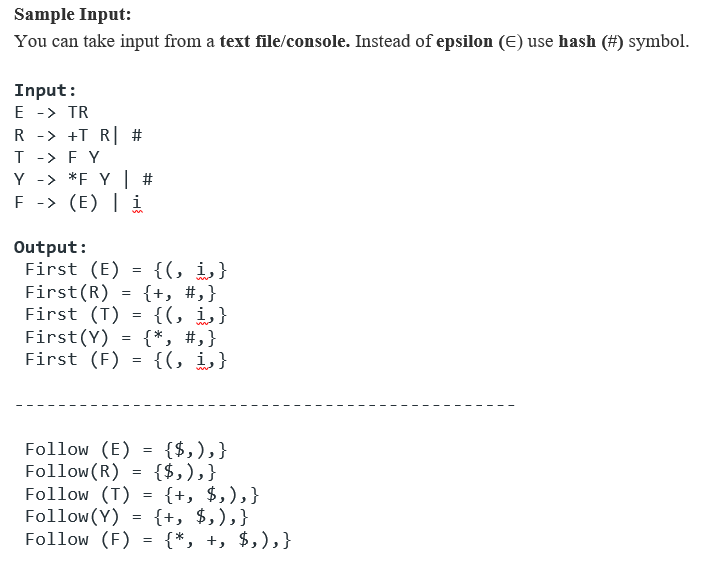







**Notes**



*   Epsilon is represented by **'#'**.
*   Productions are of the form A=B, where ‘A’ is a single Non-Terminal and ‘B’ can be any combination of Terminals and Non- Terminals.
*   Grammer is not left recursive.
*   Terminals with only single characters work, example a terminal as 'abc' wont work 
*   Don't use the same char for terminal and non terminal
*   Don't use **‘#’** or **‘$’** as they are reserved for special purposes.






    
    
    
   
    




In [17]:
import sys
import re
sys.setrecursionlimit(60)

# **First Function**

In [18]:
def First(string):
    #print("first({})".format(string))
    first_ = set()
    if string in nonterminals:
        alternatives = production_dict[string] 

        for alternative in alternatives:
            first_2 = First(alternative)
            first_ = first_ | first_2

    elif string in terminals:
        first_ = {string}

    elif string == '' or string == '#':
        first_ = {'#'}

    else:
        first_2 = First(string[0])
        if '#' in first_2:
            i = 1
            while '#' in first_2:
                

                first_ = first_ | (first_2 - {'#'})
                
                if string[i:] in terminals:
                    first_ = first_ | {string[i:]}
                    break
                elif string[i:] == '':
                    first_ = first_ | {'#'}
                    break
                first_2 = First(string[i:])
                first_ = first_ | first_2 - {'#'}
                i += 1
        else:
            first_ = first_ | first_2

    
    return first_

# **Follow Function**

In [19]:
def Follow(nT):
    
    follow_ = set()
    
    prods = production_dict.items()
    if nT == start_symbol:
        follow_ = follow_ | {'$'}
    for nt, rhs in prods:
        
        for alt in rhs:
            for char in alt:
                if char == nT:
                    following_str = alt[alt.index(char) + 1:]
                    if following_str == '':
                        if nt == nT:
                            continue
                        else:
                            follow_ = follow_ | Follow(nt)
                    else:
                        follow_2 = First(following_str)
                        if '#' in follow_2:
                            follow_ = follow_ | follow_2-{'#'}
                            follow_ = follow_ | Follow(nt)
                        else:
                            follow_ = follow_ | follow_2
    
    return follow_

In [20]:
#Notes
print("\n*REMEMBER*\n__________________________________________________\n\n=> Epsilon is represented by  # .\n=> Productions are of the form A=B, where ‘A’ is a single Non-Terminal and ‘B’ can be any combination of Terminals and Non - Terminals.\n=> Grammer is not left recursive.\n=> Terminals with only single characters work, example a terminal as 'abc' won't work.\n=> Don't use the same char for terminal and non terminal.\n=> Don't use   `#` or `$` as they are reserved for special purposes.\n__________________________________________________\n")

number_of_terminals = int(input("Enter the number of terminals : "))
terminals = []
print("Enter the terminals : ")
for i in range(number_of_terminals):
    terminals.append(input())
print("\n")

number_of_nonterminals = int(input("Enter the number of non terminals : "))
nonterminals = []
print("Enter the non terminals : ")
for j in range(number_of_nonterminals):
    nonterminals.append(input())
print("\n")

start_symbol = input("Enter the start symbol : ")
production_count = int(input("Enter the number of productions : "))
productions = []
print("Enter the productions : ")
for k in range(production_count):
    productions.append(input())
print("\n")

# input testing
print("Terminals : ",terminals)
print("Non Terminals : ",nonterminals)
print("Productions : ",productions)

# enable the dict to hold lists
production_dict = {}
for nt in nonterminals:
    production_dict[nt] = []

# split the productions into parts to simplify parsing
for production in productions:
    nonterminal_to_production = production.split("-->")
    # assumption : single char terminals
    expanded = nonterminal_to_production[1].split("|") 
    for ex in expanded:
        production_dict[nonterminal_to_production[0]].append(ex)


print("Production List=",production_dict)
print("\n")
print("First and Follow table for the given grammer:")
print("_________________________________________________________________________")

# declare dicts for first and follow as they are set of elements mapped to keys(non terminals)
FIRST = {}
FOLLOW = {}

for nonterminal in nonterminals:
    FIRST[nonterminal] = set()
    FOLLOW[nonterminal] = set()

for nonterminal in nonterminals:
    FIRST[nonterminal] = FIRST[nonterminal] | First(nonterminal)

FOLLOW[start_symbol]=FOLLOW[start_symbol] | {'$'}
for non_terminal in nonterminals:
    FOLLOW[non_terminal] = FOLLOW[non_terminal] | Follow(non_terminal)


print("{: ^20}{: ^20}{: ^20}".format('Non Terminals', 'First', 'Follow'))
print("_________________________________________________________________________")
for non_terminal in nonterminals:
    print("{: ^20}{: ^20}{: ^20}".format(non_terminal, str(
        FIRST[non_terminal]), str(FOLLOW[non_terminal]))
    )
    print("_________________________________________________________________________")


*REMEMBER*
__________________________________________________

=> Epsilon is represented by  # .
=> Productions are of the form A=B, where ‘A’ is a single Non-Terminal and ‘B’ can be any combination of Terminals and Non - Terminals.
=> Grammer is not left recursive.
=> Terminals with only single characters work, example a terminal as 'abc' won't work.
=> Don't use the same char for terminal and non terminal.
=> Don't use   `#` or `$` as they are reserved for special purposes.
__________________________________________________

Enter the number of terminals : 5
Enter the terminals : 
+
*
(
)
i


Enter the number of non terminals : 5
Enter the non terminals : 
E
R
T
Y
F


Enter the start symbol : E
Enter the number of productions : 5
Enter the productions : 
E-->TR
R-->+TR|#
T-->FY
Y-->*FY|#
F-->(E)|i


Terminals :  ['+', '*', '(', ')', 'i']
Non Terminals :  ['E', 'R', 'T', 'Y', 'F']
Productions :  ['E-->TR', 'R-->+TR|#', 'T-->FY', 'Y-->*FY|#', 'F-->(E)|i']
Production List= {'E': ['TR']